In [6]:
!pip install pandas

In [5]:
import numpy as np
import pandas as pd
from typing import List, Dict

def generate_signals() -> Dict[str, np.ndarray]:
    """Génère plusieurs signaux de test."""
    sample_rate = 1000  # Hz
    duration = 1.0      # secondes
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    signals = {
        'time': t,
        'sine_50hz': np.sin(2 * np.pi * 50 * t),
        'sine_120hz': np.sin(2 * np.pi * 120 * t),
        'mixed': (np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)),
        'noisy': (np.sin(2 * np.pi * 50 * t) + 
                 0.5 * np.sin(2 * np.pi * 120 * t) + 
                 0.2 * np.random.normal(size=len(t)))
    }
    
    return signals

def save_to_csv(signals: Dict[str, np.ndarray], filename: str = "signals.csv"):
    """Sauvegarde les signaux dans un fichier CSV."""
    df = pd.DataFrame(signals)
    df.to_csv(filename, index=False)
    print(f"Signaux sauvegardés dans {filename}")

if __name__ == "__main__":
    signals = generate_signals()
    save_to_csv(signals)

Signaux sauvegardés dans signals.csv


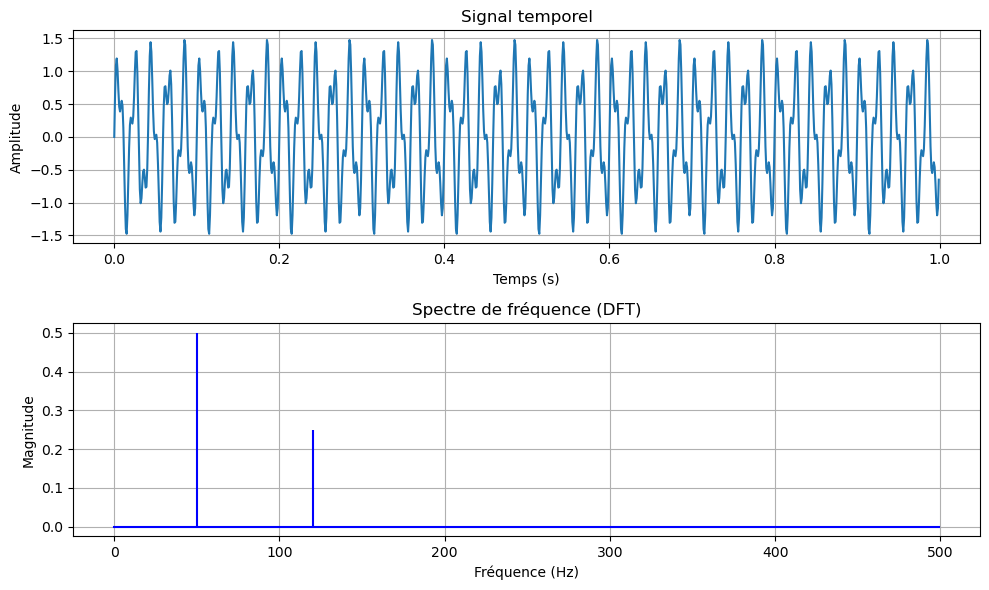

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def dft(signal: List[float]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Calcule la Transformée de Fourier Discrète d'un signal.
    
    Args:
        signal: Liste des échantillons du signal temporel
        
    Returns:
        Tuple contenant les fréquences et les amplitudes complexes
    """
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    # Calcul de la matrice exponentielle complexe
    e = np.exp(-2j * np.pi * k * n / N)
    
    # Application de la DFT
    dft_result = np.dot(e, signal)
    
    # Calcul des fréquences correspondantes
    frequencies = np.fft.fftfreq(N)
    
    return frequencies, dft_result

def plot_dft(time_domain: List[float], sample_rate: float = 1.0):
    """
    Affiche le signal temporel et son spectre de fréquence.
    
    Args:
        time_domain: Signal temporel
        sample_rate: Fréquence d'échantillonnage (Hz)
    """
    N = len(time_domain)
    t = np.arange(N) / sample_rate
    
    # Calcul de la DFT
    freqs, dft_values = dft(time_domain)
    freqs = freqs * sample_rate  # Conversion en Hz
    
    # Normalisation et calcul du module
    magnitude = np.abs(dft_values) / N
    
    # Création de la figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
    
    # Signal temporel
    ax1.plot(t, time_domain)
    ax1.set_title('Signal temporel')
    ax1.set_xlabel('Temps (s)')
    ax1.set_ylabel('Amplitude')
    ax1.grid()
    
    # Spectre fréquentiel (seulement les fréquences positives)
    positive_freqs = freqs[:N//2]
    positive_magnitude = magnitude[:N//2]
    
    ax2.stem(positive_freqs, positive_magnitude, 'b', markerfmt=" ", basefmt="-b")
    ax2.set_title('Spectre de fréquence (DFT)')
    ax2.set_xlabel('Fréquence (Hz)')
    ax2.set_ylabel('Magnitude')
    ax2.grid()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Exemple avec un signal sinusoïdal
    sample_rate = 1000  # Hz
    duration = 1.0      # secondes
    freq = 50           # Hz
    
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * freq * t) + 0.5 * np.sin(2 * np.pi * 120 * t)
    
    plot_dft(signal, sample_rate)